In [1]:
import matplotlib.pyplot as plt
import numpy as np
%config InlineBackend.figure_format = 'retina'

In [2]:
ms = 10**7
mp = 10**4
ma = 1
G = 1
Ri = 20 #intial abs(rs-rp)

In [3]:
#intial conditions 

xs = 0 
ys = 0
xp = 20
yp = 0 

rcm = (xp*mp + 0*xs)/(mp+ms)
print(rcm)

0.01998001998001998


In [4]:
#apply rcm shift 

xs = xs - rcm
xp = xp - rcm 

xa = xp* np.cos(np.radians(45))
ya = xp* np.sin(np.radians(45))

print("sun:",xs,ys)
print("planet:",xp,yp)
print("asteroid:", xa, xa)

x = [xs,xp,xa]
y = [ys,yp,ya]

#plt.scatter(x,y)

sun: -0.01998001998001998 0
planet: 19.98001998001998 0
asteroid: 14.128007616114836 14.128007616114836


In [5]:
#determine intial angular velocity (w) of planet 
#intial conditions 
#planet follows circular trajectory, asteroid also follows circular trajectory 
#neglect asteriod in w calculation 

R = 20 #intial distance from sun to planet 

w = np.sqrt(G*(mp+ms)/R**3)    #v = wXr
w = np.array([0,0,w])

print("angular velocity (w):",w)

#v = w X r (cross product)

#position vectors 
p_position = np.array([xp, yp, 0])
s_position = np.array([xs, ys, 0])
a_position = np.array([xa, ya, 0])


vp1 = np.cross(w, p_position)
vs1 = np.cross(w, s_position)
va1 = np.cross(w, a_position)

print(vp1, vs1 , va1)


angular velocity (w): [ 0.          0.         35.37301231]
[  0.         706.75349274   0.        ] [ 0.         -0.70675349  0.        ] [-499.75018734  499.75018734    0.        ]


In [6]:
def KeplerODE(t,y):
    global mp,ms,ma,G

    rs = y[0:2]
    rp = y[2:4]
    ra = y[4:6]
    vs = y[6:8]
    vp = y[8:10]
    va = y[10:12]

    drdt_S = vs
    drdt_P = vp
    drdt_A = va
    
#define r the distance between objects

    rsp = rs - rp 
    rsa = rs - ra 
    rpa = rp - ra 
    
#defining 6 forces 

    Fsp =   ms * mp * G / np.linalg.norm(rsp)**3 * rsp 
    Fsa =   ms * ma * G / np.linalg.norm(rsa)**3 * rsa 
    Fpa =   mp * ma * G / np.linalg.norm(rpa)**3 * rpa
    Fps = - Fsp
    Fas = - Fsa
    Fap = - Fpa
    

    aS = -(Fsp + Fsa)/ms
    aP = -(Fps + Fpa)/mp
    aA = -(Fas + Fap)/ma
    
    
    dvdt_S = aS
    dvdt_P = aP
    dvdt_A = aA
    
    drdt = np.concatenate((drdt_S,drdt_P, drdt_A))
    
    dvdt = np.concatenate((dvdt_S,dvdt_P, dvdt_A))

    
    return np.concatenate ((drdt, dvdt))

In [7]:
R = 20 #email what is this R value? 
P = np.sqrt(4*np.pi**2/(G*(mp+ms))*R**3)
print(P)

0.17762652645532806


In [8]:

t = 0
tmax = P/4
dt = P/1000


tt = []
xt_S = []
yt_S = [] 
xt_P = []
yt_P = [] 
xt_A = []
yt_A = [] 

#set intial conditions 

rs = np.array([xs,ys])
rp = np.array([xp,yp])
ra = np.array([xa,ya])
r = np.concatenate((rs,rp,ra))

vs = np.array([vs1[0], vs1[1]])
vp = np.array([vp1[0], vp1[1]])
va = np.array([va1[0], va1[1]])
v = np.concatenate((vs,vp,va))

y = np.concatenate((r,v)) 

print(y)
while t<tmax:
    
#this would be r from origin 

    rs = y[0:2]
    rp = y[2:4]
    ra = y[4:6]
    vs = y[6:8]
    vp = y[8:10]
    va = y[10:12]
    
    tt.append(t)
    xt_S.append(rs[0])
    yt_S.append(rs[1])
    xt_P.append(rp[0])
    yt_P.append(rp[1])
    xt_A.append(ra[0])
    yt_A.append(ra[1])
    
    
    f1 = KeplerODE(t,y)    
    f2 = KeplerODE(t+dt/2.0,y+f1*dt/2.0)
    f3 = KeplerODE(t+dt/2.0,y+f2*dt/2.0)
    f4 = KeplerODE(t+dt,y+f3*dt)
    y = y + (f1 +2.0*f2 +2.0*f3 +f4) / 6*dt
    t = t + dt
    

[-1.99800200e-02  0.00000000e+00  1.99800200e+01  0.00000000e+00
  1.41280076e+01  1.41280076e+01  0.00000000e+00 -7.06753493e-01
  0.00000000e+00  7.06753493e+02 -4.99750187e+02  4.99750187e+02]


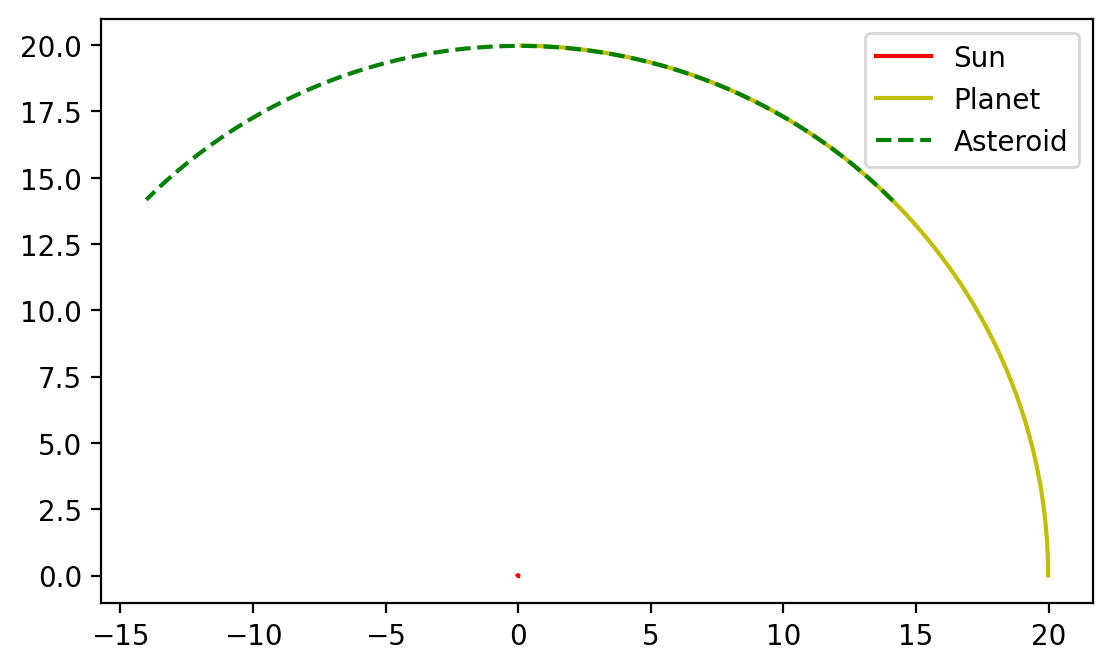

In [9]:
plt.plot(xt_S,yt_S,'r-', label = "Sun")
plt.plot(xt_P,yt_P,'y-', label = "Planet")
plt.plot(xt_A,yt_A,'g--', label = "Asteroid")

#plt.plot(0,0,'*',mfc='w',ms=10, label = "origin")
plt.gca().set_aspect('equal', adjustable='box')
plt.legend()
plt.show()

In [ ]:
def TransformIntoPlanetFrame(xp,yp,x,y):
    phi = np.arctan2(yp,xp)
    s = np.sin(phi)
    c = np.cos(phi)

    A = np.array( [ [c,s] , [-s,c] ] )

    r  = np.array([x,y])
    rt = A.dot(r) # matrix vector multiplication

    xt = rt[0]
    yt = rt[1]
    
    return [xt,yt] #return the transformed coordinates

In [20]:
#5 transforming coordinates 

t = 0
tmax = P*20
dt = P/1000


tt = []
xt_S = []
yt_S = [] 
xt_P = []
yt_P = [] 
xt_A = []
yt_A = [] 
xt_A_t = []
yt_A_t = []


#set intial conditions 

rs = np.array([xs,ys])
rp = np.array([xp,yp])
ra = np.array([xa,ya])
r = np.concatenate((rs,rp,ra))

vs = np.array([vs1[0], vs1[1]])
vp = np.array([vp1[0], vp1[1]])
va = np.array([va1[0], va1[1]])
v = np.concatenate((vs,vp,va))

y = np.concatenate((r,v)) 

print(y)
while t<tmax:
    
#this would be r from origin 

    rs = y[0:2]
    rp = y[2:4]
    ra = y[4:6]
    vs = y[6:8]
    vp = y[8:10]
    va = y[10:12]
    
    ra_trans = TransformIntoPlanetFrame(rp[0], rp[1], ra[0], ra[1])

    tt.append(t)
    xt_S.append(rs[0])
    yt_S.append(rs[1])
    xt_P.append(rp[0])
    yt_P.append(rp[1])
    xt_A.append(ra[0])
    yt_A.append(ra[1])
    xt_A_t.append(ra_trans[0])
    yt_A_t.append(ra_trans[1])
    
    
    f1 = KeplerODE(t,y)    
    f2 = KeplerODE(t+dt/2.0,y+f1*dt/2.0)
    f3 = KeplerODE(t+dt/2.0,y+f2*dt/2.0)
    f4 = KeplerODE(t+dt,y+f3*dt)
    y = y + (f1 +2.0*f2 +2.0*f3 +f4) / 6*dt
    t = t + dt
    

[-1.99800200e-02  0.00000000e+00  1.99800200e+01  0.00000000e+00
  1.41280076e+01  1.41280076e+01  0.00000000e+00 -7.06753493e-01
  0.00000000e+00  7.06753493e+02 -4.99750187e+02  4.99750187e+02]


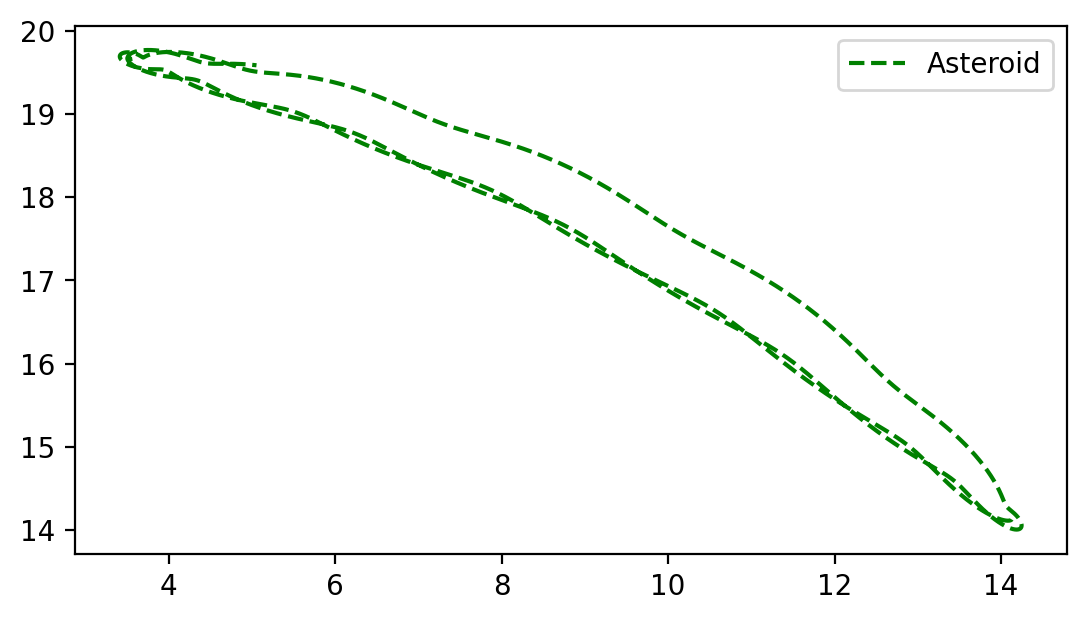

In [22]:

plt.plot(xt_A_t, yt_A_t,'g--', label = "Asteroid")
plt.gca().set_aspect('equal', adjustable='box')
plt.legend()
plt.show()

In [51]:
#increase simulation to 100 orbits and change intial angle 

angle = 85

xs = xs - rcm
xp = xp - rcm 

xa = xp* np.cos(np.radians(angle))
ya = xp* np.sin(np.radians(angle))

print("asteroid position:", xa, ya)

x = [xs,xp,xa]
y = [ys,yp,ya]

a_position = np.array([xa, ya, 0])

va1 = np.cross(w, a_position)

print("velocity asteriod:", va1)



asteroid position: 1.7239597466569727 19.7049500721444
velocity asteriod: [-697.0234415    60.98164934    0.        ]


In [52]:
t = 0
tmax = P*100
dt = P/1000


tt = []
xt_S = []
yt_S = [] 
xt_P = []
yt_P = [] 
xt_A = []
yt_A = [] 
xt_A_t = []
yt_A_t = []


#set intial conditions 

rs = np.array([xs,ys])
rp = np.array([xp,yp])
ra = np.array([xa,ya])
r = np.concatenate((rs,rp,ra))

vs = np.array([vs1[0], vs1[1]])
vp = np.array([vp1[0], vp1[1]])
va = np.array([va1[0], va1[1]])
v = np.concatenate((vs,vp,va))

y = np.concatenate((r,v)) 

print(y)
while t<tmax:
    
#this would be r from origin 

    rs = y[0:2]
    rp = y[2:4]
    ra = y[4:6]
    vs = y[6:8]
    vp = y[8:10]
    va = y[10:12]
    
    ra_trans = TransformIntoPlanetFrame(rp[0], rp[1], ra[0], ra[1])

    tt.append(t)
    xt_S.append(rs[0])
    yt_S.append(rs[1])
    xt_P.append(rp[0])
    yt_P.append(rp[1])
    xt_A.append(ra[0])
    yt_A.append(ra[1])
    xt_A_t.append(ra_trans[0])
    yt_A_t.append(ra_trans[1])
    
    
    f1 = KeplerODE(t,y)    
    f2 = KeplerODE(t+dt/2.0,y+f1*dt/2.0)
    f3 = KeplerODE(t+dt/2.0,y+f2*dt/2.0)
    f4 = KeplerODE(t+dt,y+f3*dt)
    y = y + (f1 +2.0*f2 +2.0*f3 +f4) / 6*dt
    t = t + dt
    

[-2.19780220e-01  0.00000000e+00  1.97802198e+01  0.00000000e+00
  1.72395975e+00  1.97049501e+01  0.00000000e+00 -7.06753493e-01
  0.00000000e+00  7.06753493e+02 -6.97023442e+02  6.09816493e+01]


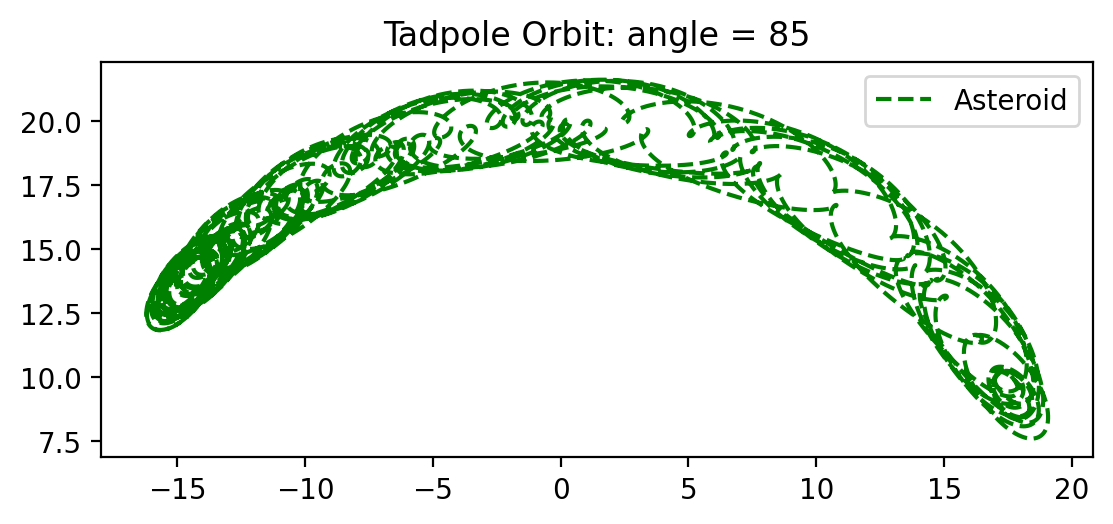

In [55]:
plt.plot(xt_A_t, yt_A_t,'g--', label = "Asteroid")
plt.title(label = "Tadpole Orbit: angle = 85")
plt.gca().set_aspect('equal', adjustable='box')
plt.legend()
plt.show()

In [44]:
angle = 25

xs = xs - rcm
xp = xp - rcm 

xa = xp* np.cos(np.radians(angle))
ya = xp* np.sin(np.radians(angle))

print("asteroid position:", xa, ya)

x = [xs,xp,xa]
y = [ys,yp,ya]

a_position = np.array([xa, ya, 0])

va1 = np.cross(w, a_position)

print("velocity asteriod:", va1)



asteroid position: 17.963183311495627 8.37636994299248
velocity asteriod: [-296.29743712  635.41190443    0.        ]


In [45]:
t = 0
tmax = P*100
dt = P/1000


tt = []
xt_S = []
yt_S = [] 
xt_P = []
yt_P = [] 
xt_A = []
yt_A = [] 
xt_A_t = []
yt_A_t = []


#set intial conditions 

rs = np.array([xs,ys])
rp = np.array([xp,yp])
ra = np.array([xa,ya])
r = np.concatenate((rs,rp,ra))

vs = np.array([vs1[0], vs1[1]])
vp = np.array([vp1[0], vp1[1]])
va = np.array([va1[0], va1[1]])
v = np.concatenate((vs,vp,va))

y = np.concatenate((r,v)) 

print(y)
while t<tmax:
    
#this would be r from origin 

    rs = y[0:2]
    rp = y[2:4]
    ra = y[4:6]
    vs = y[6:8]
    vp = y[8:10]
    va = y[10:12]
    
    ra_trans = TransformIntoPlanetFrame(rp[0], rp[1], ra[0], ra[1])

    tt.append(t)
    xt_S.append(rs[0])
    yt_S.append(rs[1])
    xt_P.append(rp[0])
    yt_P.append(rp[1])
    xt_A.append(ra[0])
    yt_A.append(ra[1])
    xt_A_t.append(ra_trans[0])
    yt_A_t.append(ra_trans[1])
    
    
    f1 = KeplerODE(t,y)    
    f2 = KeplerODE(t+dt/2.0,y+f1*dt/2.0)
    f3 = KeplerODE(t+dt/2.0,y+f2*dt/2.0)
    f4 = KeplerODE(t+dt,y+f3*dt)
    y = y + (f1 +2.0*f2 +2.0*f3 +f4) / 6*dt
    t = t + dt
    

[-1.79820180e-01  0.00000000e+00  1.98201798e+01  0.00000000e+00
  1.79631833e+01  8.37636994e+00  0.00000000e+00 -7.06753493e-01
  0.00000000e+00  7.06753493e+02 -2.96297437e+02  6.35411904e+02]


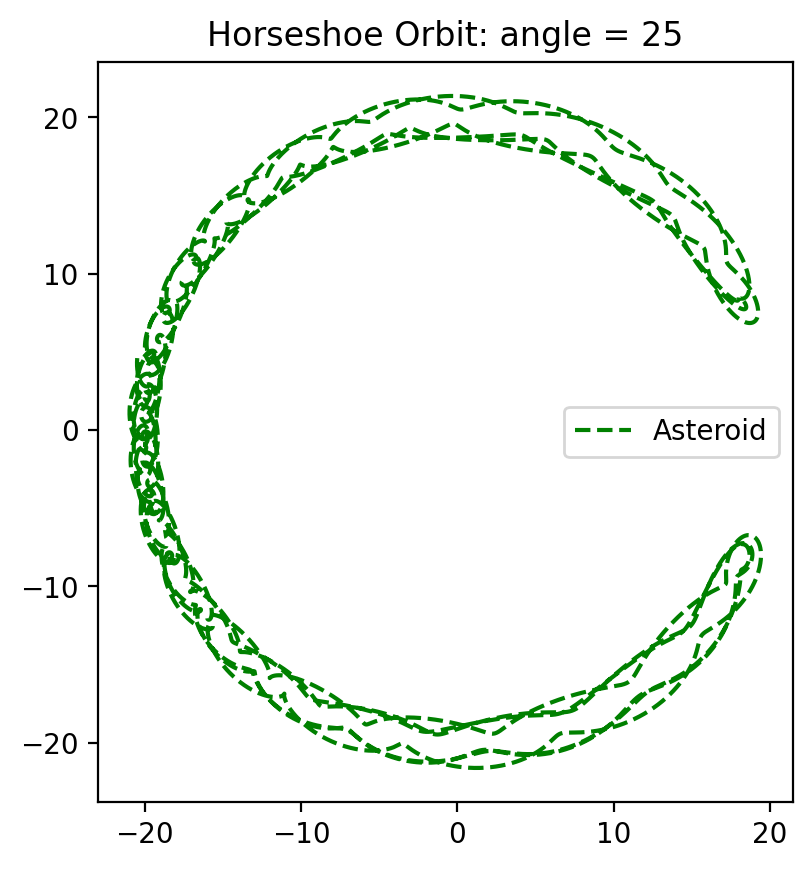

In [47]:
plt.plot(xt_A_t, yt_A_t,'g--', label = "Asteroid")
plt.title(label = "Horseshoe Orbit: angle = 25")
plt.gca().set_aspect('equal', adjustable='box')
plt.legend()
plt.show()

In [ ]:
#angles analzed: 25, 45, and 85 degrees
#angle 45 prodced the smallest tadpole, meaning it is the closest to Lagrange point L4